## Importing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer # treat only specific columns like encode this and not that
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv('Data/movie_data_w_star_power.csv', low_memory=False)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,...,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power,director_power
0,0,0,False,30000000.0,en,21.946943,1995-10-30,Released,7.7,5415.0,...,81.0,1995.0,Toy Story,mid,343554033.0,1.145180e+03,all_time_blockbuster,10.0,0.0,0.0
1,1,1,False,65000000.0,en,17.015539,1995-12-15,Released,6.9,2413.0,...,104.0,1995.0,Jumanji,high,197797249.0,3.043035e+02,all_time_blockbuster,12.0,0.0,0.0
2,2,2,False,0.0,en,11.712900,1995-12-22,Released,6.5,92.0,...,101.0,1995.0,Grumpier Old Men,low,0.0,0.000000e+00,below_avg,12.0,0.0,0.0
3,3,3,False,16000000.0,en,3.859495,1995-12-22,Released,6.1,34.0,...,127.0,1995.0,Waiting to Exhale,mid,65452156.0,4.090760e+02,all_time_blockbuster,12.0,0.0,0.0
4,4,4,False,0.0,en,8.387519,1995-02-10,Released,5.7,173.0,...,106.0,1995.0,Father of the Bride Part II,low,76578911.0,7.657891e+14,all_time_blockbuster,2.0,0.0,0.0


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'adult', 'budget', 'original_language',
       'popularity', 'release_date', 'status', 'vote_average', 'vote_count',
       'certificate', 'rating', 'director', 'director_id', 'star', 'star_id',
       'votes', 'collection_id', 'collection_name', 'spoken_language_1',
       'spoken_language_2', 'production_company_1_name',
       'production_company_1_id', 'production_company_2_name',
       'production_company_2_id', 'production_company_3_name',
       'production_company_3_id', 'production_country_1_name',
       'production_country_2_name', 'production_country_3_name',
       'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation',
       'genre_Aniplex', 'genre_BROSTA TV', 'genre_Biography',
       'genre_Carousel Productions', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
       'genre_Film-Noir', 'genre_Foreign', 'genre_Game-Show', 'genre_GoHands',
       'genre_History',

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)


In [7]:
df.head()

,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,certificate,rating,director,director_id,star,star_id,votes,collection_id,collection_name,spoken_language_1,spoken_language_2,production_company_1_name,production_company_1_id,production_company_2_name,production_company_2_id,production_company_3_name,production_company_3_id,production_country_1_name,production_country_2_name,production_country_3_name,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Aniplex,genre_BROSTA TV,genre_Biography,genre_Carousel Productions,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Foreign,genre_Game-Show,genre_GoHands,genre_History,genre_Horror,genre_Mardock Scramble Production Committee,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Odyssey Media,genre_Pulser Productions,genre_Reality-TV,genre_Rogue State,genre_Romance,genre_Sci-Fi,genre_Science Fiction,genre_Sentai Filmworks,genre_Sport,genre_TV Movie,genre_Telescene Film Group Productions,genre_The Cartel,genre_Thriller,genre_Vision View Entertainment,genre_War,genre_Western,revenue,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power,director_power
0,False,30000000.0,en,21.946943,1995-10-30,Released,7.7,5415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection,English,NaN,Pixar Animation Studios,3.0,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,373554033.0,81.0,1995.0,Toy Story,mid,343554033.0,1.145180e+03,all_time_blockbuster,10.0,0.0,0.0
1,False,65000000.0,en,17.015539,1995-12-15,Released,6.9,2413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,Français,TriStar Pictures,559.0,Teitler Film,2550.0,Interscope Communications,10201.0,United States of America,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262797249.0,104.0,1995.0,Jumanji,high,197797249.0,3.043035e+02,all_time_blockbuster,12.0,0.0,0.0
2,False,0.0,en,11.712900,1995-12-22,Released,6.5,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection,English,NaN,Warner Bros.,6194.0,Lancaster Gate,19464.0,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,101.0,1995.0,Grumpier Old Men,low,0.0,0.000000e+00,below_avg,12.0,0.0,0.0
3,False,16000000.0,en,3.859495,1995-12-22,Released,6.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,Twentieth Century Fox Film Corporation,306.0,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81452156.0,127.0,1995.0,Waiting to Exhale,mid,65452156.0,4.090760e+02,all_time_blockbuster,12.0,0.0,0.0
4,False,0.0,en,8.387519,1995-02-10,Released,5.7,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96871.0,Father of the Bride Collection,English,NaN,Sandollar Productions,5842.0,Touchstone Pictures,9195.0,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76578911.0,106.0,1995.0,Father of the Bride Part II,low,76578911.0,7.657891e+14,all_time_blockbuster,2.0,0.0,0.0


## Feature Selection

In [9]:
X = df[['budget','release_year','release_month','runtime','certificate','star_power','director_power']]
y = df['movie_class']

## Splitting the dataset into test and train

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Combining and Pipelining

### Scaling and Imputation

In [22]:
numeric_min_max = ['budget', 'director_power', 'star_power']
numeric_standard = ['release_month', 'release_year']
categorical_features = ['certificate']

numeric_transformer_imputer = Pipeline([
    ('imputer', IterativeImputer(random_state=0)),
    ('scaler_standard', StandardScaler())
])
numeric_transformer_min_max = Pipeline([
    ('scaler_min_max', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Rated')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num1', numeric_transformer_imputer, numeric_standard),
        ('cat', categorical_transformer, categorical_features),
        ('num2', numeric_transformer_min_max, numeric_min_max),
    ])



### Modelling

In [25]:
# The parameters for RandomForestClassifier found through Grid Search
classifier_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
}

# Create a pipeline with a preprocessor and a RandomForestClassifier with best params
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('classifier', RandomForestClassifier(**classifier_params))
])

# Fit the pipeline on the training data
model = best_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9938


In [26]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['all_time_blockbuster', 'blockbuster', 'super_hit','hit','above_average','average',
                                                                   'below_avg','flop','disaster'])


d:\AIT\Sem 1\ComputerProgrammingforDSandAI\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AIT\Sem 1\ComputerProgrammingforDSandAI\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AIT\Sem 1\ComputerProgrammingforDSandAI\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [27]:
print(class_report)

                      precision    recall  f1-score   support

all_time_blockbuster       0.00      0.00      0.00        37
         blockbuster       0.44      0.24      0.31       918
           super_hit       0.00      0.00      0.00        24
                 hit       1.00      1.00      1.00    166912
       above_average       0.00      0.00      0.00        92
             average       0.98      0.99      0.99     27677
           below_avg       1.00      0.01      0.03        68
                flop       0.00      0.00      0.00        30
            disaster       0.00      0.00      0.00        67

            accuracy                           0.99    195825
           macro avg       0.38      0.25      0.26    195825
        weighted avg       0.99      0.99      0.99    195825



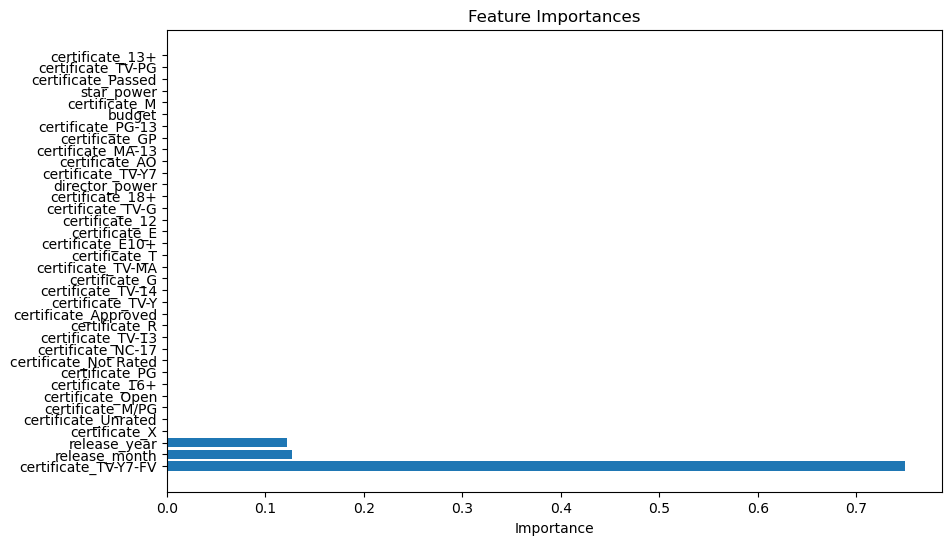

In [41]:
# Get feature importances from the model
feature_importances = model.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
numeric_features = numeric_standard + numeric_min_max
categorical_features = categorical_features
feature_names = numeric_features + categorical_features

# Get feature names from the preprocessor
one_hot_feature_names = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(['certificate'])
feature_names = numeric_features + list(one_hot_feature_names)

# Create a DataFrame to associate features with their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances directly from the DataFrame
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


## Deploying the model

In [ ]:
import pickle
import joblib

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler_standard',
                                                                   StandardScaler())]),
                                                  ['release_month',
                                                   'release_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Rated',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['certificate']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler_min_max',
                                                                   MinMaxScaler())]),
                                                  ['budget', 'director_power',
                                                   'star_power'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=200))])

In [ ]:
pickle.dump(model, open('model/model.pkl','wb+')) 

In [ ]:
loaded_model = joblib.load('model/model.pkl')

In [ ]:
loaded_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler_standard',
                                                                   StandardScaler())]),
                                                  ['release_month',
                                                   'release_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Rated',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['certificate']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler_min_max',
                                                                   MinMaxScaler())]),
                                                  ['budget', 'director_power',
                                                   'star_power'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=2,
                                        min_samples_split=10,
                                        n_estimators=200))])